## **Imports**

In [1]:
# First Of All We Import The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  missingno as msno
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor , LinearRegression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
data = pd.read_csv('cardata.csv')                   # import data
data.head(10)             # 10 head

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

### Casting Object Data as Categorical Data and
### Casting int Data as Float Data

In [5]:
data[['Car_Name' , 'Fuel_Type' ,
      'Seller_Type' , 'Transmission']] = data[['Car_Name' , 'Fuel_Type' ,
                                               'Seller_Type' , 'Transmission']].astype('category')

In [6]:
data[['Year' , 'Kms_Driven' , 'Owner']] = data[['Year' , 'Kms_Driven' , 'Owner']].astype('float')

In [7]:
data.dtypes

Car_Name         category
Year              float64
Selling_Price     float64
Present_Price     float64
Kms_Driven        float64
Fuel_Type        category
Seller_Type      category
Transmission     category
Owner             float64
dtype: object

### Make 'Age' Column

In [8]:
df = pd.DataFrame(data)                      # Convert to dataframe
Age = [max(df['Year'] +1) - i for i in df['Year']]                   # make 'Age' column and add to dataframe
df.insert(0 , 'Age' , Age)
df.head()

,Age,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,6.0,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,2.0,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,8.0,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,5.0,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0


In [9]:
df.columns

Index(['Age', 'Car_Name', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
df.info()                  #Information from dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            301 non-null    float64 
 1   Car_Name       301 non-null    category
 2   Year           301 non-null    float64 
 3   Selling_Price  301 non-null    float64 
 4   Present_Price  301 non-null    float64 
 5   Kms_Driven     301 non-null    float64 
 6   Fuel_Type      301 non-null    category
 7   Seller_Type    301 non-null    category
 8   Transmission   301 non-null    category
 9   Owner          301 non-null    float64 
dtypes: category(4), float64(6)
memory usage: 18.6 KB


### Drop 'Car_Name' and 'Year'

In [11]:
df.drop(['Car_Name','Year'] , axis=1 , inplace=True)             #drop 'Car_Name' and 'Year' features

In [12]:
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,6.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,2.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,8.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,5.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0


## **Train_Test_Split**

In [13]:
train_set , test_set = train_test_split(df , test_size=0.2 , random_state=0)
train_set.shape , test_set.shape

((240, 8), (61, 8))

## **Missing Values**

In [14]:
train_set.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

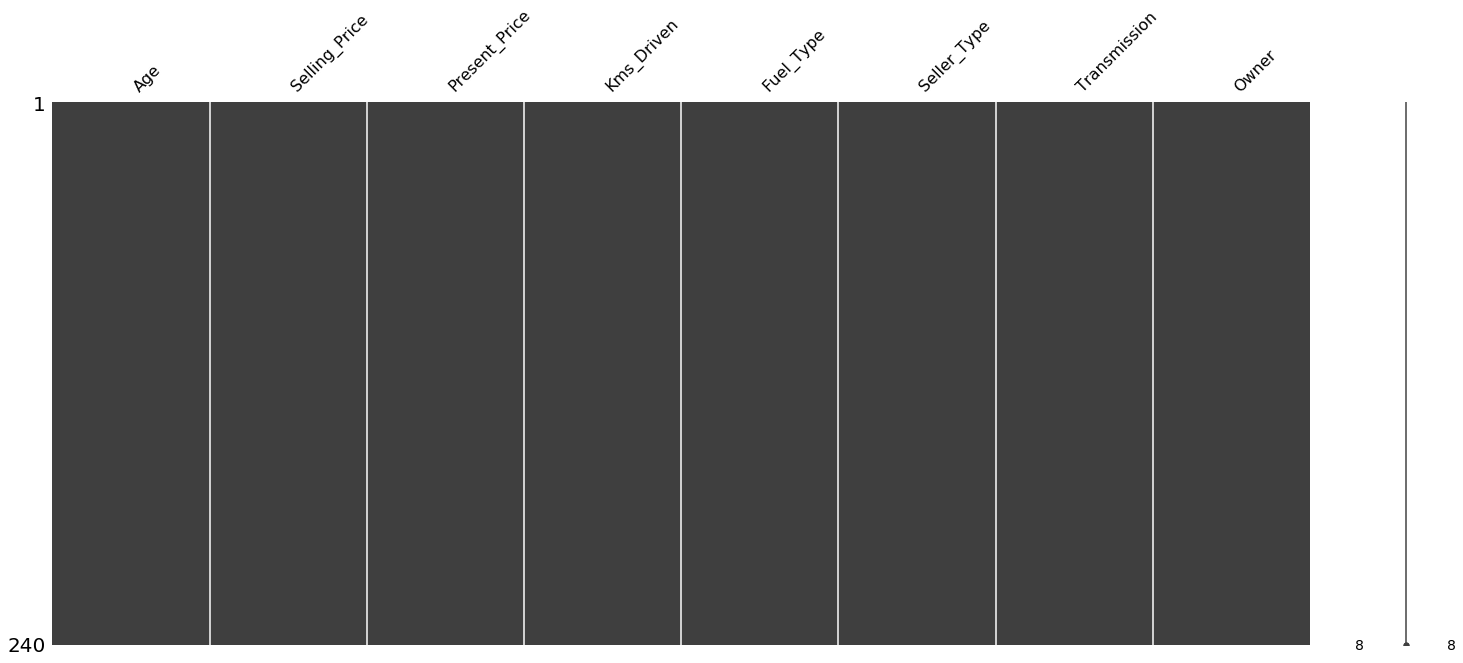

In [15]:
msno.matrix(train_set);

## **Encoding Categorical Features**

In [16]:
train_set2 = pd.get_dummies(train_set , columns=['Transmission','Seller_Type'] , drop_first=True , dtype=np.float64)
train_set2.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Transmission_Manual,Seller_Type_Individual
74,5.0,4.90,8.93,83000.0,Diesel,0.0,1.0,0.0
239,7.0,2.00,4.43,23709.0,Petrol,0.0,1.0,0.0
64,2.0,33.00,36.23,6000.0,Diesel,0.0,0.0,0.0
294,5.0,3.75,6.80,33019.0,Petrol,0.0,1.0,0.0
286,3.0,5.65,7.90,28569.0,Petrol,0.0,1.0,0.0


In [17]:
train_set2 = pd.get_dummies(train_set2 , dtype=np.float64)
train_set2.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
74,5.0,4.90,8.93,83000.0,0.0,1.0,0.0,0.0,1.0,0.0
239,7.0,2.00,4.43,23709.0,0.0,1.0,0.0,0.0,0.0,1.0
64,2.0,33.00,36.23,6000.0,0.0,0.0,0.0,0.0,1.0,0.0
294,5.0,3.75,6.80,33019.0,0.0,1.0,0.0,0.0,0.0,1.0
286,3.0,5.65,7.90,28569.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
train_set2 = train_set2[['Age', 'Kms_Driven', 'Owner',
       'Transmission_Manual', 'Seller_Type_Individual', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Present_Price' , 'Selling_Price']]

In [19]:
train_set2

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Present_Price,Selling_Price
74,5.0,83000.0,0.0,1.0,0.0,0.0,1.0,0.0,8.93,4.90
239,7.0,23709.0,0.0,1.0,0.0,0.0,0.0,1.0,4.43,2.00
64,2.0,6000.0,0.0,0.0,0.0,0.0,1.0,0.0,36.23,33.00
294,5.0,33019.0,0.0,1.0,0.0,0.0,0.0,1.0,6.80,3.75
286,3.0,28569.0,0.0,1.0,0.0,0.0,0.0,1.0,7.90,5.65
...,...,...,...,...,...,...,...,...,...,...
251,6.0,56701.0,0.0,1.0,0.0,0.0,0.0,1.0,9.90,5.00
192,12.0,49000.0,1.0,1.0,1.0,0.0,0.0,1.0,0.75,0.20
117,4.0,14000.0,0.0,1.0,1.0,0.0,0.0,1.0,1.90,1.10
47,13.0,65000.0,0.0,1.0,0.0,0.0,0.0,1.0,4.15,1.05


## **Exploratory Data Analysis (EDA)**

### *Single Varaible Analysis*

In [20]:
train_set2.columns

Index(['Age', 'Kms_Driven', 'Owner', 'Transmission_Manual',
       'Seller_Type_Individual', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Present_Price', 'Selling_Price'],
      dtype='object')

In [21]:
numerical_features = ['Kms_Driven', 'Present_Price', 'Selling_Price']

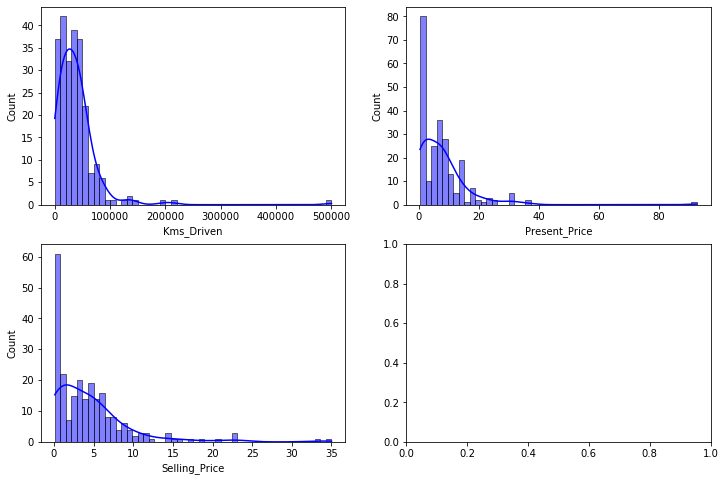

In [22]:
fig , ax = plt.subplots(2 , 2 , figsize=(12 , 8))
ax_flat = ax.flatten()

for i , col in enumerate(numerical_features):
    ax = ax_flat[i]
    sns.histplot(train_set2[col] , bins=50 , kde=True , color='b' , ax=ax)

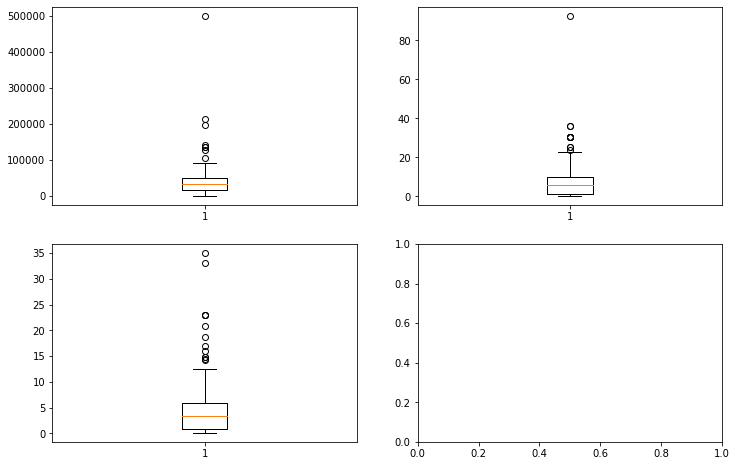

In [23]:
fig , ax = plt.subplots(2 , 2 , figsize=(12 , 8))
ax_flat = ax.flatten()

for i , col in enumerate(numerical_features):
    ax = ax_flat[i]
    ax.boxplot(train_set2[col])

### *Two Varaibles Analysis*

#### * Correlation

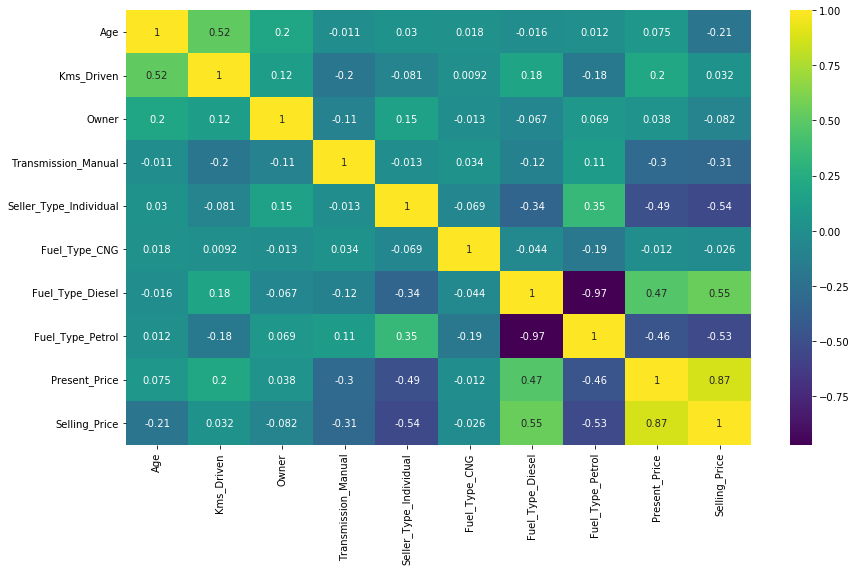

In [24]:
plt.figure(figsize=(14, 8))
corr = train_set2.corr()
sns.heatmap(corr, annot=True, cmap='viridis');

In [25]:
corr[['Selling_Price']].abs().sort_values(by='Selling_Price')

,Selling_Price
Fuel_Type_CNG,0.025646
Kms_Driven,0.031521
Owner,0.081703
Age,0.205928
Transmission_Manual,0.313426
Fuel_Type_Petrol,0.531790
Seller_Type_Individual,0.537520
Fuel_Type_Diesel,0.546658
Present_Price,0.874183
Selling_Price,1.000000


#### * Plots

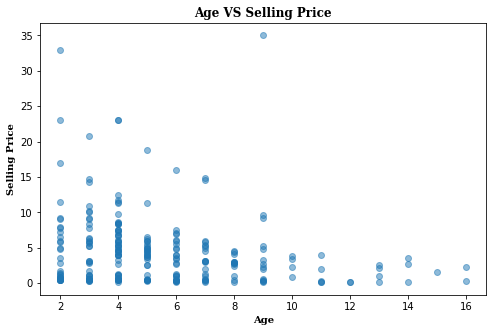

In [26]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Age , train_set2.Selling_Price , alpha=0.5);
plt.title('Age VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Age' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

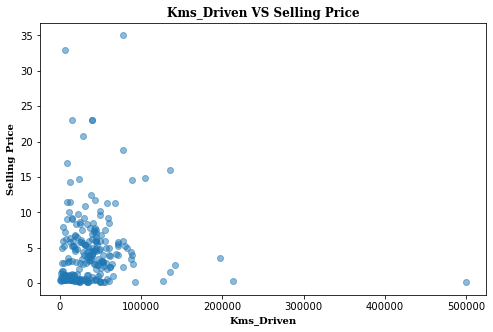

In [27]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Kms_Driven , train_set2.Selling_Price , alpha=0.5);
plt.title('Kms_Driven VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Kms_Driven' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

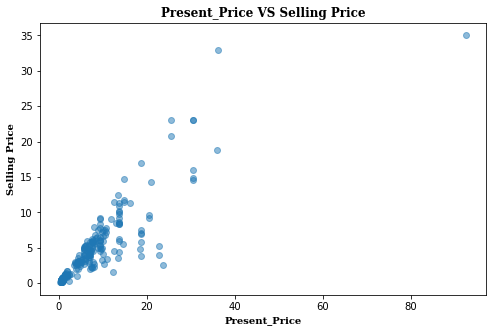

In [28]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Present_Price , train_set2.Selling_Price , alpha=0.5);
plt.title('Present_Price VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Present_Price' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

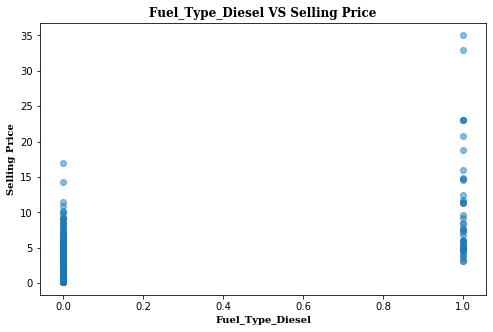

In [29]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Fuel_Type_Diesel , train_set2.Selling_Price , alpha=0.5);
plt.title('Fuel_Type_Diesel VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Fuel_Type_Diesel' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

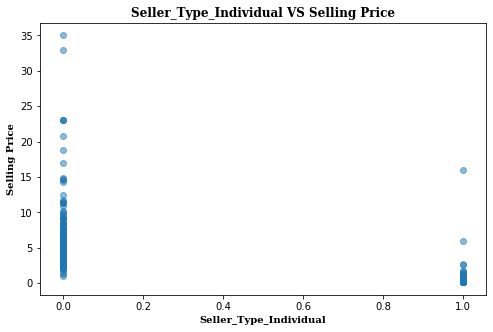

In [30]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Seller_Type_Individual , train_set2.Selling_Price , alpha=0.5);
plt.title('Seller_Type_Individual VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Seller_Type_Individual' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

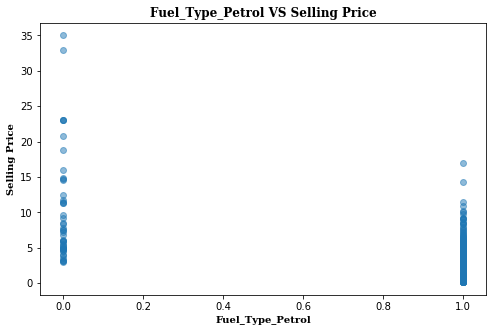

In [31]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Fuel_Type_Petrol , train_set2.Selling_Price , alpha=0.5);
plt.title('Fuel_Type_Petrol VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Fuel_Type_Petrol' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

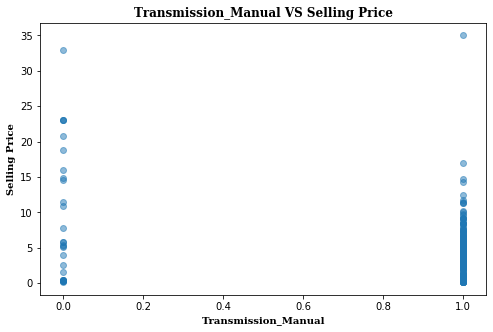

In [32]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Transmission_Manual , train_set2.Selling_Price , alpha=0.5);
plt.title('Transmission_Manual VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Transmission_Manual' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

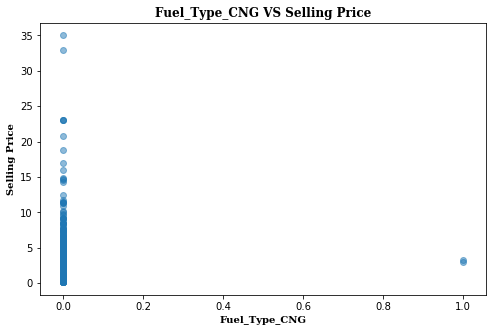

In [33]:
plt.figure(figsize=(8 , 5))
plt.scatter(train_set2.Fuel_Type_CNG , train_set2.Selling_Price , alpha=0.5);
plt.title('Fuel_Type_CNG VS Selling Price' , fontweight='bold' , fontfamily='Serif');
plt.xlabel('Fuel_Type_CNG' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Selling Price' , fontweight='bold' , fontfamily='Serif');

In [34]:
train_set2.Fuel_Type_Diesel.value_counts()

0.0    195
1.0     45
Name: Fuel_Type_Diesel, dtype: int64

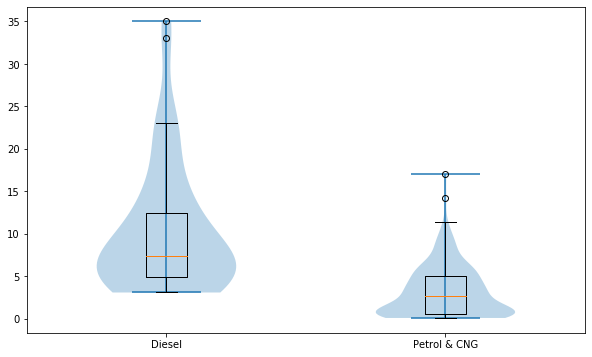

In [35]:
flags = train_set2.Fuel_Type_Diesel.astype(np.bool_)

plt.figure(figsize=(10 , 6))
plt.boxplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]] , labels=['Diesel','Petrol & CNG']);
plt.violinplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]]);

In [36]:
train_set2.Seller_Type_Individual.value_counts()

0.0    153
1.0     87
Name: Seller_Type_Individual, dtype: int64

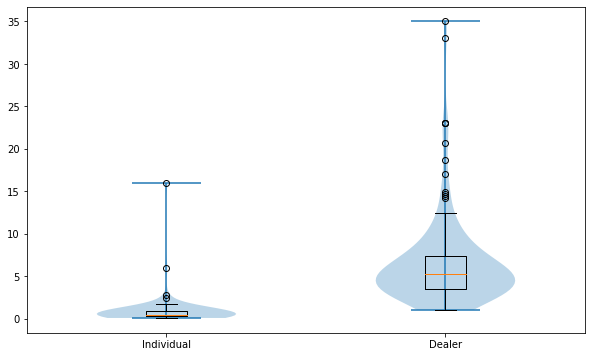

In [37]:
flags = train_set2.Seller_Type_Individual.astype(np.bool_)

plt.figure(figsize=(10 , 6))
plt.boxplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]] , labels=['Individual' , 'Dealer']);
plt.violinplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]]);

In [38]:
train_set2.Transmission_Manual.value_counts()

1.0    211
0.0     29
Name: Transmission_Manual, dtype: int64

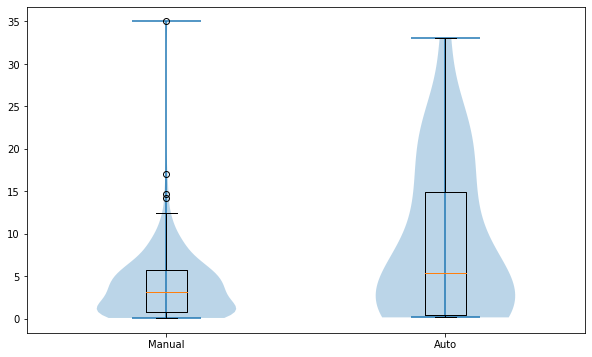

In [39]:
flags = train_set2.Transmission_Manual.astype(np.bool_)

plt.figure(figsize=(10 , 6))
plt.boxplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]], labels=['Manual' , 'Auto']);
plt.violinplot([train_set2.Selling_Price.values[flags], train_set2.Selling_Price.values[~flags]]);

### *Multi Varaibles Analysis*

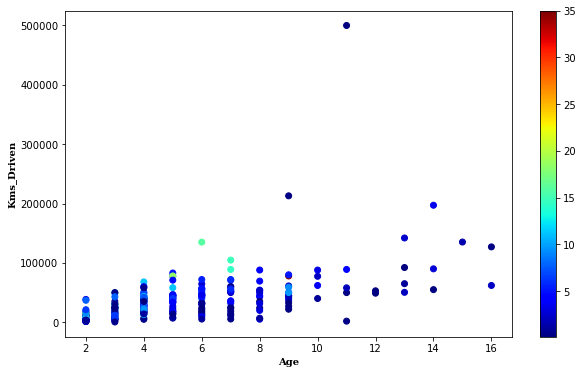

In [40]:
plt.figure(figsize=(10 , 6))
plt.scatter(train_set2.Age , train_set2.Kms_Driven , c = train_set2.Selling_Price.values, cmap='jet');
plt.xlabel('Age' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Kms_Driven' , fontweight='bold' , fontfamily='Serif');

plt.colorbar();

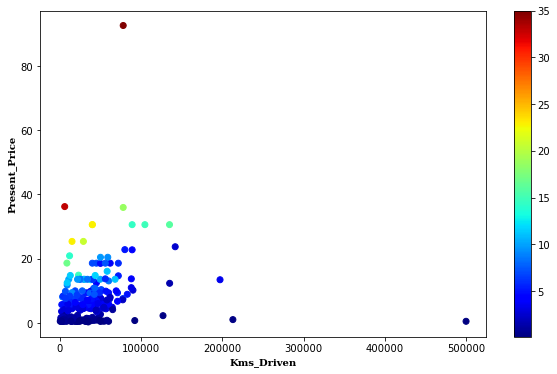

In [41]:
plt.figure(figsize=(10 , 6))
plt.scatter(train_set2.Kms_Driven , train_set2.Present_Price , c = train_set2.Selling_Price.values, cmap='jet');
plt.xlabel('Kms_Driven' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Present_Price' , fontweight='bold' , fontfamily='Serif');

plt.colorbar();

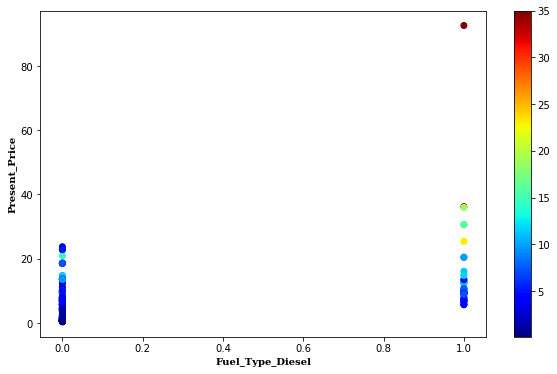

In [42]:
plt.figure(figsize=(10 , 6))
plt.scatter(train_set2.Fuel_Type_Diesel , train_set2.Present_Price , c = train_set2.Selling_Price.values, cmap='jet');
plt.xlabel('Fuel_Type_Diesel' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Present_Price' , fontweight='bold' , fontfamily='Serif');

plt.colorbar();

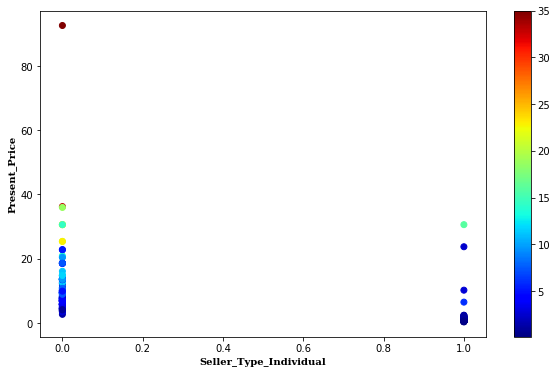

In [43]:
plt.figure(figsize=(10 , 6))
plt.scatter(train_set2.Seller_Type_Individual , train_set2.Present_Price , c = train_set2.Selling_Price.values, cmap='jet');
plt.xlabel('Seller_Type_Individual' , fontweight='bold' , fontfamily='Serif');
plt.ylabel('Present_Price' , fontweight='bold' , fontfamily='Serif');

plt.colorbar();

## **Outliers**

#### * Numerical features

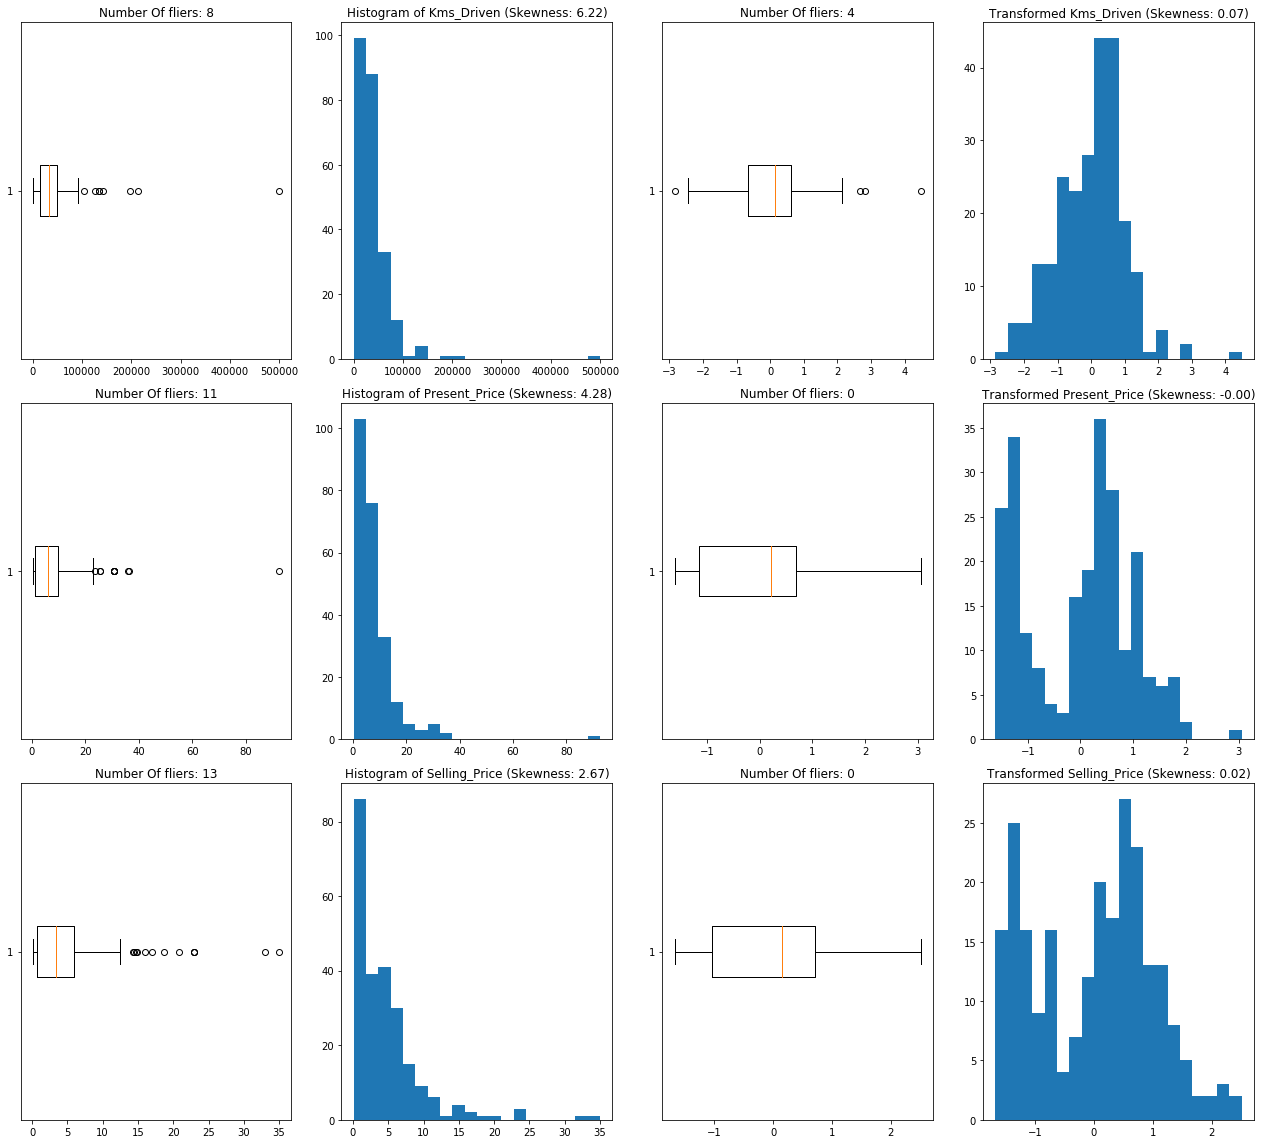

In [44]:
pt = PowerTransformer()

cols = ['Kms_Driven', 'Present_Price', 'Selling_Price']
n_rows = len(cols)

fig , axes = plt.subplots(n_rows , 4 , figsize=(18 , 16))

for i , col in enumerate(cols):
    # compute skewness of original feature
    skewness_orig = skew(train_set[col])
    
    # plot boxplot of original feature
    fliers = axes[i , 0].boxplot(train_set2[col] , vert=False , whis=1.5)['fliers'][0].get_ydata()
    axes[i , 0].set_title(f'Number Of fliers: {len(fliers)}')
    
    # plot histogram of original feature
    axes[i , 1].hist(train_set2[col] , bins=20)
    axes[i , 1].set_title(f'Histogram of {col} (Skewness: {skewness_orig:.2f})')
    
    # plot boxplot of PowerTransformer transformed feature
    transformed_feature = pt.fit_transform(train_set2[col][: , None])
    skewness_transformed = skew(transformed_feature)
    transformed_fliers = axes[i , 2].boxplot(transformed_feature , vert=False , whis=1.5)['fliers'][0].get_ydata()
    axes[i , 2].set_title(f'Number Of fliers: {len(transformed_fliers)}')
    
    # plot histogram of PowerTransformer transformed feature
    axes[i , 3].hist(transformed_feature , bins=20)
    axes[i , 3].set_title(f'Transformed {col} (Skewness: {skewness_transformed[0]:.2f})')
    
# Adjust subplot spacing and display the figure
plt.tight_layout()
plt.show()

In [45]:
cols = ['Kms_Driven', 'Present_Price', 'Selling_Price']
train_set3 = train_set2.copy()
train_set3[cols] = pt.fit_transform(train_set2[cols])

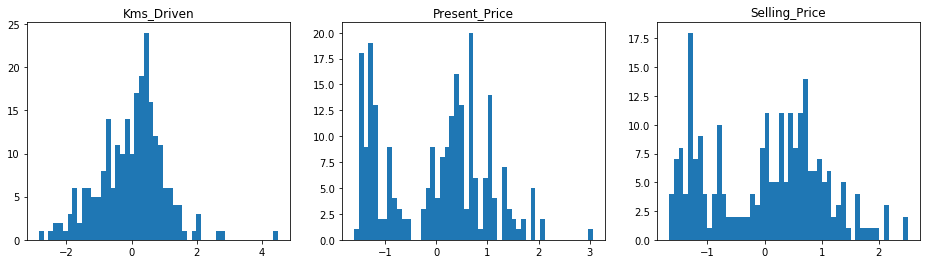

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes_flat = axes.flatten()

cols = ['Kms_Driven', 'Present_Price', 'Selling_Price']
for i, col in enumerate(cols):
    ax = axes_flat[i]
    ax.hist(train_set3[col], 50)
    ax.set_title(col)

In [47]:
train_set3

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Present_Price,Selling_Price
74,5.0,1.316876,0.0,1.0,0.0,0.0,1.0,0.0,0.591877,0.519985
239,7.0,-0.212439,0.0,1.0,0.0,0.0,0.0,1.0,-0.069303,-0.319306
64,2.0,-1.437766,0.0,0.0,0.0,0.0,1.0,0.0,2.044083,2.451251
294,5.0,0.148325,0.0,1.0,0.0,0.0,0.0,1.0,0.327259,0.256985
286,3.0,-0.012870,0.0,1.0,0.0,0.0,0.0,1.0,0.471827,0.662765
...,...,...,...,...,...,...,...,...,...,...
251,6.0,0.802356,0.0,1.0,0.0,0.0,0.0,1.0,0.694085,0.540140
192,12.0,0.617364,1.0,1.0,1.0,0.0,0.0,1.0,-1.306034,-1.548992
117,4.0,-0.730384,0.0,1.0,1.0,0.0,0.0,1.0,-0.754940,-0.784872
47,13.0,0.981422,0.0,1.0,0.0,0.0,0.0,1.0,-0.127231,-0.816918


In [48]:
## Remove 'Fuel_Type_CNG' from dataset 

train_set3.drop(['Fuel_Type_CNG'] , axis=1 , inplace=True)
train_set3.shape

(240, 9)

## **Data/Feature Reduction**

In [49]:
## Remove 'Fuel_Type_Petrol' feature (correlation 0.97 with Fuel_Type_Diesel)

train_set3.drop(['Fuel_Type_Petrol'] , axis=1 , inplace=True)
train_set3.shape

(240, 8)

In [50]:
corr = train_set3.corr()
corr[['Selling_Price']].abs().sort_values(by='Selling_Price')

,Selling_Price
Owner,0.109408
Transmission_Manual,0.148420
Kms_Driven,0.169638
Age,0.232971
Fuel_Type_Diesel,0.507808
Seller_Type_Individual,0.825056
Present_Price,0.943342
Selling_Price,1.000000


## **Data Normalization**

### *MinMaxScaler*

In [51]:
cols = ['Age' , 'Kms_Driven', 'Present_Price', 'Selling_Price']

normz = MinMaxScaler()

train_set3[cols] = normz.fit_transform(train_set3[cols])
train_set3

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Present_Price,Selling_Price
74,0.214286,0.567773,0.0,1.0,0.0,1.0,0.471774,0.524247
239,0.357143,0.359259,0.0,1.0,0.0,0.0,0.330321,0.323483
64,0.000000,0.192192,0.0,0.0,0.0,1.0,0.782459,0.986221
294,0.214286,0.408447,0.0,1.0,0.0,0.0,0.415162,0.461336
286,0.071429,0.386469,0.0,1.0,0.0,0.0,0.446091,0.558401
...,...,...,...,...,...,...,...,...
251,0.285714,0.497621,0.0,1.0,0.0,0.0,0.493640,0.529069
192,0.714286,0.472398,1.0,1.0,1.0,0.0,0.065736,0.029333
117,0.142857,0.288640,0.0,1.0,1.0,0.0,0.183636,0.212116
47,0.785714,0.522035,0.0,1.0,0.0,0.0,0.317928,0.204450


### *StandardScaler*

## **Model Selection**

In [52]:
train_set3 = train_set3.values
X = np.delete(train_set3 , -1 , axis=1)
y = train_set3[: , [-1]]
X.shape , y.shape

((240, 7), (240, 1))

In [53]:
model = SGDRegressor(random_state=2)

### *Coarse Grid with `RandomizedSearchCV`*

In [54]:
lrs = np.logspace(-3 , 0 , 50)
alphas = np.logspace(-6 , 0 , 50)
penalty = ['l2', 'l1', 'elasticnet']

param_distr = {'eta0': lrs, 'alpha': alphas , 'penalty':penalty}

In [55]:
random_search = RandomizedSearchCV(model, param_distr, n_iter=200, cv=2)
random_search.fit(X, y.ravel())

random_search.best_params_, random_search.best_score_

({'penalty': 'l2', 'eta0': 0.868511373751352, 'alpha': 3.0888435964774785e-06},
 0.9641273468469713)

### *Fine Grid with `GridSearchCV`*

In [56]:
model = SGDRegressor(penalty = 'elasticnet' , random_state=2)

In [57]:
_ , lr, alpha = random_search.best_params_.values()

d1, d2 = 0.1, 0.1
lrs = np.r_[np.linspace((1-d1)*lr, (1+d1)*lr, 50), lr]
alphas = np.r_[np.linspace((1+d2)*alpha, (1+d2)*alpha, 50), alpha]

param_grid = {'eta0': lrs, 'alpha': alphas}

In [58]:
grid_search = GridSearchCV(model, param_grid , cv=2)
grid_search.fit(X, y.ravel())

# Best parameters
grid_search.best_params_, grid_search.best_score_

({'alpha': 3.0888435964774785e-06, 'eta0': 0.8915535122386329},
 0.9641379637609381)

### *Best Model*

In [59]:
model = grid_search.best_estimator_
model.coef_, model.intercept_

(array([-0.25807034, -0.07095089, -0.02518621, -0.00641464, -0.04801342,
         0.0489472 ,  0.90064313]),
 array([0.19668483]))

## **Test**

#### *Missing Values*

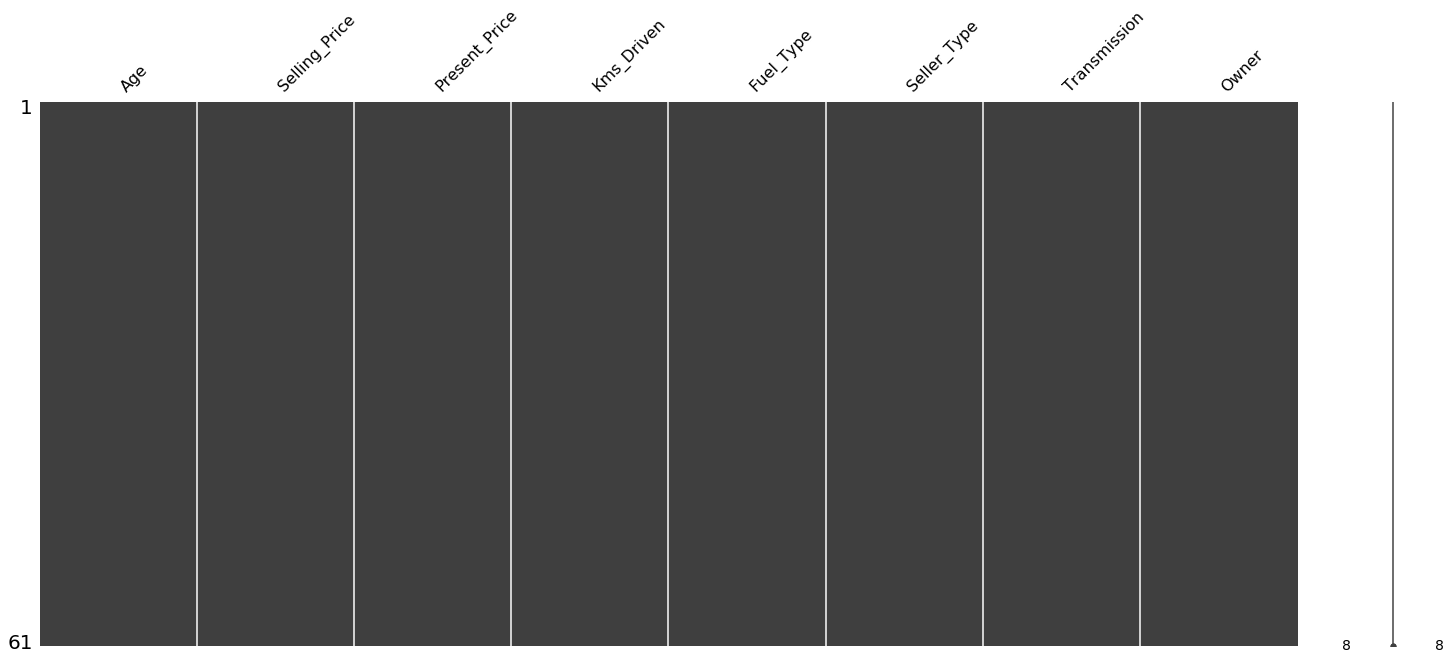

In [60]:
msno.matrix(test_set);

In [61]:
test_set.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### *Encoding Categorical Features*

In [62]:
test_set = pd.get_dummies(test_set , columns=['Transmission','Seller_Type'] , drop_first=True , dtype=np.float64)
test_set.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Transmission_Manual,Seller_Type_Individual
223,4.0,8.25,9.400,61381.0,Diesel,0.0,1.0,0.0
150,8.0,0.50,0.826,6000.0,Petrol,0.0,1.0,1.0
226,4.0,5.25,5.700,24678.0,Petrol,0.0,1.0,0.0
296,3.0,9.50,11.600,33988.0,Diesel,0.0,1.0,0.0
52,2.0,18.00,19.770,15000.0,Diesel,0.0,0.0,0.0


In [63]:
test_set = pd.get_dummies(test_set , dtype=np.float64)
test_set.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
223,4.0,8.25,9.400,61381.0,0.0,1.0,0.0,0.0,1.0,0.0
150,8.0,0.50,0.826,6000.0,0.0,1.0,1.0,0.0,0.0,1.0
226,4.0,5.25,5.700,24678.0,0.0,1.0,0.0,0.0,0.0,1.0
296,3.0,9.50,11.600,33988.0,0.0,1.0,0.0,0.0,1.0,0.0
52,2.0,18.00,19.770,15000.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
test_set = test_set[['Age', 'Kms_Driven', 'Owner',
       'Transmission_Manual', 'Seller_Type_Individual', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Present_Price' , 'Selling_Price']]

In [65]:
test_set

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Present_Price,Selling_Price
223,4.0,61381.0,0.0,1.0,0.0,0.0,1.0,0.0,9.400,8.25
150,8.0,6000.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826,0.50
226,4.0,24678.0,0.0,1.0,0.0,0.0,0.0,1.0,5.700,5.25
296,3.0,33988.0,0.0,1.0,0.0,0.0,1.0,0.0,11.600,9.50
52,2.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,19.770,18.00
...,...,...,...,...,...,...,...,...,...,...
137,6.0,16000.0,0.0,1.0,1.0,0.0,0.0,1.0,0.787,0.65
227,8.0,57000.0,0.0,1.0,0.0,0.0,0.0,1.0,4.430,2.55
26,6.0,55138.0,0.0,1.0,0.0,0.0,0.0,1.0,5.870,4.15
106,5.0,16500.0,1.0,1.0,1.0,0.0,0.0,1.0,3.450,1.35


#### *Feature Transform*

In [66]:
cols = ['Kms_Driven', 'Present_Price', 'Selling_Price']
test_set[cols] = pt.transform(test_set[cols])

In [67]:
test_set

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Present_Price,Selling_Price
223,4.0,0.905609,0.0,1.0,0.0,0.0,1.0,0.0,0.642587,1.047940
150,8.0,-1.437766,0.0,1.0,1.0,0.0,0.0,1.0,-1.259686,-1.239263
226,4.0,-0.170315,0.0,1.0,0.0,0.0,0.0,1.0,0.160756,0.588955
296,3.0,0.181209,0.0,1.0,0.0,0.0,1.0,0.0,0.853086,1.192596
52,2.0,-0.666212,0.0,0.0,0.0,0.0,1.0,0.0,1.401996,1.846027
...,...,...,...,...,...,...,...,...,...,...
137,6.0,-0.605215,0.0,1.0,1.0,0.0,0.0,1.0,-1.283224,-1.109024
227,8.0,0.809143,0.0,1.0,0.0,0.0,0.0,1.0,-0.069303,-0.105177
26,6.0,0.766429,0.0,1.0,0.0,0.0,0.0,1.0,0.188195,0.355718
106,5.0,-0.575798,1.0,1.0,1.0,0.0,0.0,1.0,-0.287027,-0.636292


#### *Data/Feature Reduction*

In [68]:
test_set.drop(['Fuel_Type_Petrol' , 'Fuel_Type_CNG'] , axis=1 , inplace=True)
test_set.head()

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Present_Price,Selling_Price
223,4.0,0.905609,0.0,1.0,0.0,1.0,0.642587,1.047940
150,8.0,-1.437766,0.0,1.0,1.0,0.0,-1.259686,-1.239263
226,4.0,-0.170315,0.0,1.0,0.0,0.0,0.160756,0.588955
296,3.0,0.181209,0.0,1.0,0.0,1.0,0.853086,1.192596
52,2.0,-0.666212,0.0,0.0,0.0,1.0,1.401996,1.846027


#### *Data Normalization*

In [69]:
cols = ['Age' , 'Kms_Driven', 'Present_Price', 'Selling_Price']

test_set[cols] = normz.transform(test_set[cols])
test_set

,Age,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Present_Price,Selling_Price
223,0.142857,0.511699,0.0,1.0,0.0,1.0,0.482623,0.650538
150,0.428571,0.192192,0.0,1.0,1.0,0.0,0.075651,0.103422
226,0.142857,0.365002,0.0,1.0,0.0,0.0,0.379540,0.540746
296,0.071429,0.412931,0.0,1.0,0.0,1.0,0.527657,0.685141
52,0.000000,0.297389,0.0,0.0,0.0,1.0,0.645091,0.841447
...,...,...,...,...,...,...,...,...
137,0.285714,0.305706,0.0,1.0,1.0,0.0,0.070616,0.134576
227,0.428571,0.498546,0.0,1.0,0.0,0.0,0.330321,0.374704
26,0.285714,0.492722,0.0,1.0,0.0,0.0,0.385410,0.484954
106,0.214286,0.309717,1.0,1.0,1.0,0.0,0.283742,0.247657


#### *Test Model*

In [70]:
test_set = test_set.values
X_test = np.delete(test_set , -1 , axis=1)
y_test = test_set[: , [-1]]
X_test.shape , y_test.shape

((61, 7), (61, 1))

In [71]:
print(f'R2-Score on test data is {model.score(X_test , y_test)}')

R2-Score on test data is 0.9721286257886893


#### *Predict New Data*

In [94]:
# {'Age':10, 'Selling_Price':? , 'Present_Price': 11.23 , 'Kms_Driven': 42000 , 'Fuel_Type':Petrol, 
# 'Seller_Type':Dealer , 'Transmission': Manual, 'Owner':1}

# Replace 6 for Selling Price for transform for now

X_new = np.array([[10 , 42000 , 1 , 1 , 0 , 0 , 11.23 , 6]])
X_new[: , [1 , -2 , -1]] = pt.transform(X_new[: , [1 , -2 , -1]])
X_new

array([[10.        ,  0.4289029 ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.82038216,  0.72345508]])

In [95]:
X_new[: , [0 , 1 , -2 , -1]] = normz.transform(X_new[: , [0 , 1 , -2 , -1]])
X_new

array([[0.57142857, 0.44670241, 1.        , 1.        , 0.        ,
        0.        , 0.52066038, 0.57291901]])

In [97]:
y_hat_new = model.predict(X_new[: , :7])

In [98]:
y_hat_new

array([0.45485048])

In [117]:
concat_data = np.concatenate((X_new[: , [0 , 1 , -2]] , y_hat_new[: , None]) , axis=1)

In [121]:
inverse_norm_data = normz.inverse_transform(concat_data)

In [128]:
inverse_pt_data = pt.inverse_transform([inverse_norm_data[0][1:]])

In [127]:
[inverse_norm_data[0][1:]]

[array([0.4289029 , 0.82038216, 0.22987294])]

In [129]:
inverse_pt_data

array([[4.20000000e+04, 1.12300000e+01, 3.64622378e+00]])

In [154]:
finall_value = inverse_pt_data[0][-1]
print(f'Selling Price is {finall_value:.2f}')

Selling Price is 3.65
